In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Dataset

In [4]:
#Importing the dataset
df= pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking shape of dataset
df.shape

(908, 25)

There are 908 rows and 25 columns in dataset.

In [6]:
#Checking the data types of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
#Checking null values in dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

 As we observe that we have null values present in a dataset.

# Check the valuee count and drop unnecessary coloums

In [11]:
#lets check entries in generation_data_source column
df["generation_data_source"].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [12]:
# lets check entries in the year_of_capacity_data 
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [13]:
colms = ["estimated_generation_gwh","wepp_id","other_fuel2","other_fuel3"]
df.drop(columns = colms, axis = 1, inplace = True)
df.isnull().sum()         

KeyError: "['estimated_generation_gwh' 'wepp_id' 'other_fuel2' 'other_fuel3'] not found in axis"

In [14]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [15]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64

In [16]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [17]:
df['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [18]:
df = df.drop(['year_of_capacity_data'], axis = 1)

In [19]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [20]:
df['other_fuel1'] = df['other_fuel1'].fillna('UK')
df['other_fuel1'].value_counts()

UK              709
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [21]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [22]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [23]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [24]:
df['generation_data_source'] = df['generation_data_source'].fillna('UK')
df['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2010.0    17
          ..
1946.0     1
1956.0     1
1937.0     1
1959.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [25]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['latitude'].value_counts()

19.0004    3
24.1917    3
14.2352    2
16.5697    2
15.1839    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 837, dtype: int64

In [26]:
df['longitude'].value_counts()

71.6917    4
71.6918    3
72.8983    3
81.2875    3
75.8988    3
          ..
72.7629    1
70.3961    1
74.2393    1
77.0435    1
77.4768    1
Name: longitude, Length: 828, dtype: int64

In [27]:
df['generation_gwh_2013'].value_counts()

0.000000       21
631.777928      1
605.533700      1
8801.420000     1
507.897750      1
               ..
2630.113350     1
2999.023000     1
246.421700      1
2942.810000     1
20.900000       1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [28]:
df['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
1154.342000     1
451.053400      1
3239.142900     1
3155.000000     1
3194.359820     1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [29]:
df['generation_gwh_2015'].value_counts()

0.000000        28
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 398, dtype: int64

In [30]:
df['generation_gwh_2016'].value_counts()

0.000000        31
8470.570000      2
1511.000000      2
886.004428       1
1363.080350      1
                ..
131.021600       1
6130.019928      1
5931.490000      1
14834.800000     1
233.596650       1
Name: generation_gwh_2016, Length: 405, dtype: int64

In [31]:
df['generation_gwh_2017'].value_counts()

0.00000        33
170.08530       2
663.77450       1
35.51155        1
0.97510         1
               ..
15177.00000     1
191.94545       1
307.37540       1
382.43820       1
865.40000       1
Name: generation_gwh_2017, Length: 410, dtype: int64

In [32]:
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1                0
commissioning_year         0
owner                      0
source                     0
url                        0
geolocation_source         0
generation_gwh_2013        0
generation_gwh_2014        0
generation_gwh_2015        0
generation_gwh_2016        0
generation_gwh_2017        0
generation_data_source     0
dtype: int64

In [33]:
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [34]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [35]:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In [36]:
df = df.drop(['country', 'country_long'], axis = 1)
df.dtypes

name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [37]:
df = df.drop(['gppd_idnr', 'name'], axis = 1)
df.nunique()

capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
other_fuel1                 4
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      2
dtype: int64

In [38]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             908 non-null    float64
 1   latitude                908 non-null    float64
 2   longitude               908 non-null    float64
 3   primary_fuel            908 non-null    object 
 4   other_fuel1             908 non-null    object 
 5   commissioning_year      908 non-null    float64
 6   owner                   908 non-null    object 
 7   source                  908 non-null    object 
 8   url                     908 non-null    object 
 9   geolocation_source      908 non-null    object 
 10  generation_gwh_2013     908 non-null    float64
 11  generation_gwh_2014     908 non-null    float64
 12  generation_gwh_2015     908 non-null    float64
 13  generation_gwh_2016     908 non-null    float64
 14  generation_gwh_2017     908 non-null    fl

In [39]:
# lets check the dataset now after changing the null values
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,UK,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK
1,98.0,24.7663,74.6090,Coal,UK,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK
2,39.2,21.9038,69.3732,Wind,UK,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK
3,135.0,23.8712,91.3602,Gas,UK,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,UK,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK
905,25.5,15.2758,75.5811,Wind,UK,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK
906,80.0,24.3500,73.7477,Coal,UK,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,UK


In [40]:
#Checking unique values of each columns
df.nunique()

capacity_mw               365
latitude                  838
longitude                 829
primary_fuel                8
other_fuel1                 4
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2013       365
generation_gwh_2014       375
generation_gwh_2015       399
generation_gwh_2016       406
generation_gwh_2017       411
generation_data_source      2
dtype: int64

There are number of unique values in each column.

In [41]:
#Checking description of dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.225679,77.410936,2003.624449,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.089450,4.783873,15.238021,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1997.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.778300,76.719250,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [42]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

# Data Visualization

# Univariate Analysis

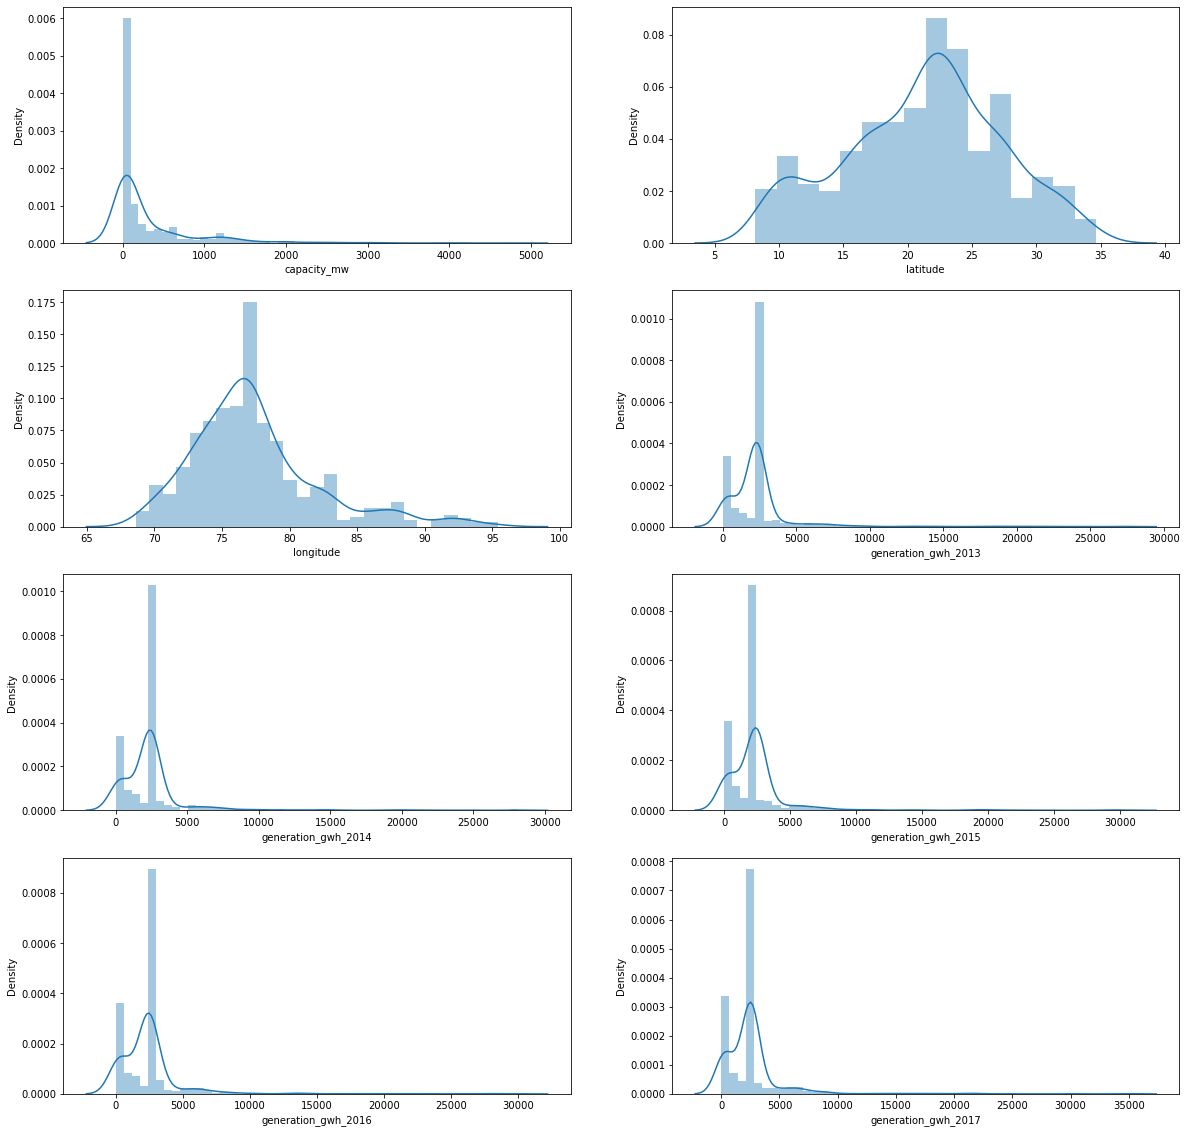

In [45]:
# Using Distplot
columns = ['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.distplot(df[i],kde=True,ax=ax[row,col])
    col += 1

According to the above images we obsereved that all the columns are not normally distributed.

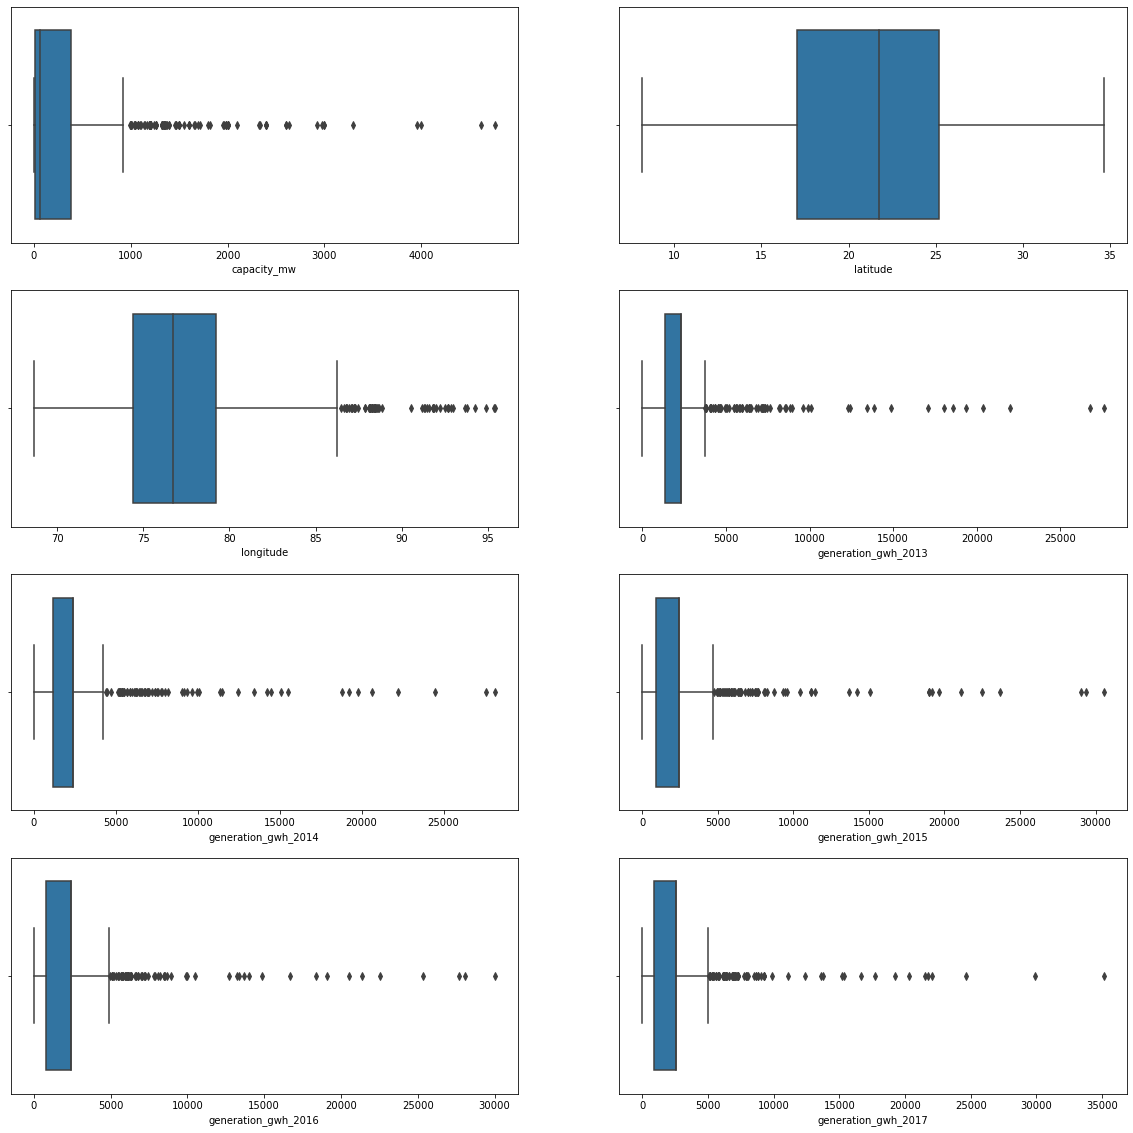

In [47]:
# Using Boxplot
fig,ax = plt.subplots(4,2,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(df[i],ax=ax[row,col])
    col += 1

According to the above images we obsereved that in boxplot all input variable is having outliers in it. So, we need remove outliers from that the input variables.

# Removing outliers

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
le=LabelEncoder()
col = ['primary_fuel','other_fuel1','owner','source','geolocation_source','generation_data_source']
for i in col:
    df[i] = le.fit_transform(df[i])
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,229,109,http://www.nrel.gov/csp/solarpaces/project_det...,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,98.0,24.7663,74.6090,1,3,2013.0,258,174,http://www.ultratechcement.com/,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,7,3,2013.0,2,21,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,135.0,23.8712,91.3602,2,3,2004.0,5,22,http://www.cea.nic.in/,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,http://www.cea.nic.in/,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2016.0,5,22,http://www.cea.nic.in/,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,6,3,2013.0,114,77,http://karnatakapower.com,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,25.5,15.2758,75.5811,7,3,2013.0,5,21,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,80.0,24.3500,73.7477,1,3,2013.0,91,59,http://www.hzlindia.com/,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [49]:
df = df.drop(['url'], axis = 1)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,229,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,98.0,24.7663,74.6090,1,3,2013.0,258,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,7,3,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,135.0,23.8712,91.3602,2,3,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,1,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0


In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]
df_zscore.shape

(832, 15)

In [52]:
#checking for skewness
df_zscore.skew()

capacity_mw               1.958229
latitude                 -0.128644
longitude                 0.881116
primary_fuel              0.415028
other_fuel1              -1.441965
commissioning_year       -1.598889
owner                     1.318465
source                    1.780743
geolocation_source       -2.100174
generation_gwh_2013       1.546690
generation_gwh_2014       1.454599
generation_gwh_2015       1.338087
generation_gwh_2016       1.360805
generation_gwh_2017       1.253852
generation_data_source   -0.072293
dtype: float64

In [53]:
# So let us apply yeo johnson
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df_zscore)
df_zscore=pd.DataFrame(dfpt,columns=df_zscore.columns)
df_zscore.skew()

capacity_mw               0.010266
latitude                 -0.075186
longitude                -0.001011
primary_fuel             -0.056522
other_fuel1              -1.441965
commissioning_year       -1.156748
owner                     0.436652
source                   -0.177686
geolocation_source       -2.072059
generation_gwh_2013      -0.170928
generation_gwh_2014      -0.253236
generation_gwh_2015      -0.317494
generation_gwh_2016      -0.312547
generation_gwh_2017      -0.346010
generation_data_source   -0.072293
dtype: float64

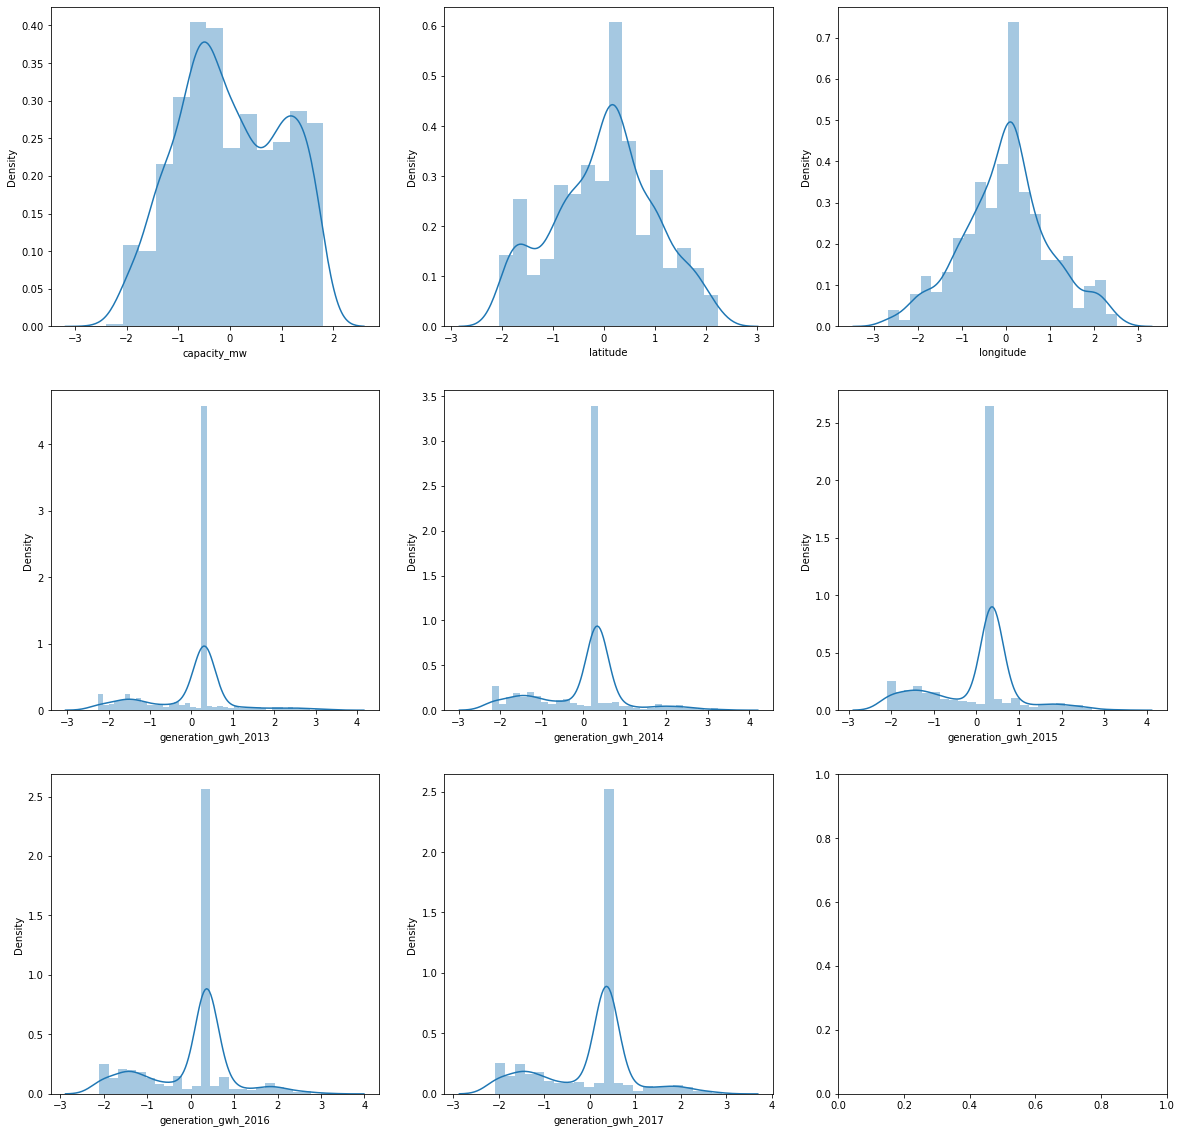

In [55]:
fig,ax = plt.subplots(3,3,figsize=(20,20))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.distplot(df_zscore[i],ax=ax[row,col])
    col += 1

According to the above images we obsereved that all the columns are normally distributed.

# Multivariate Analysis

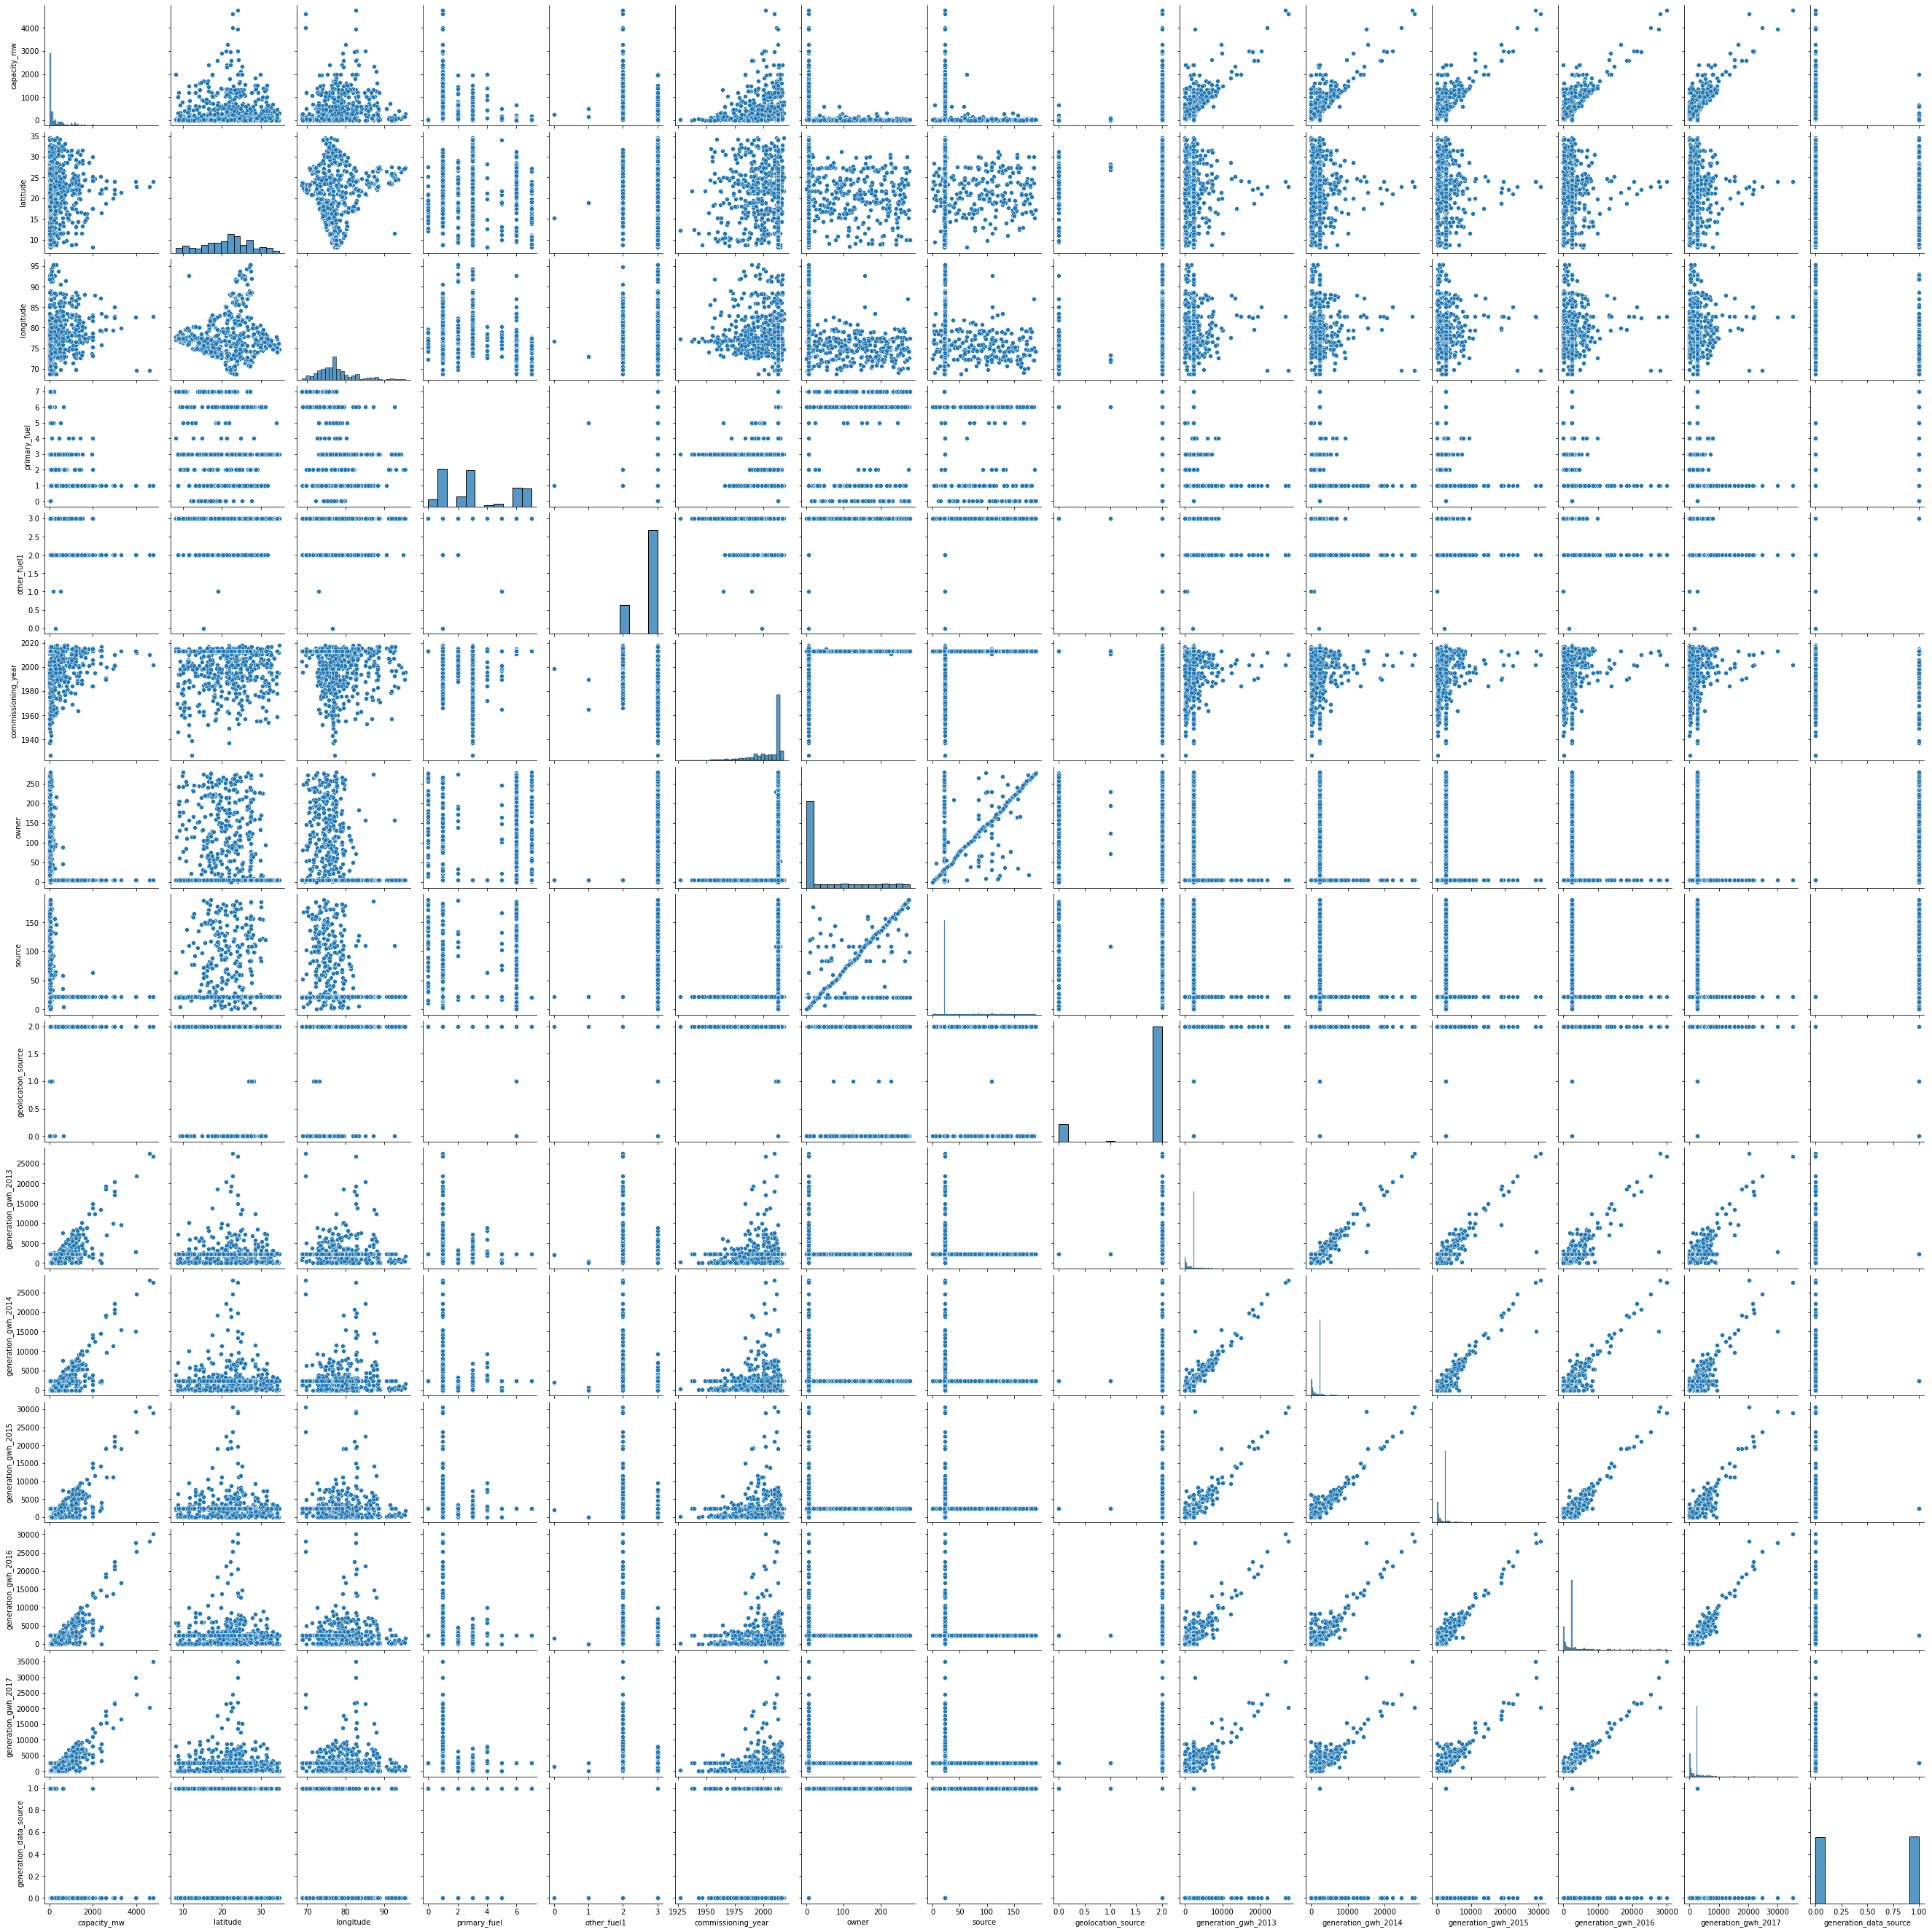

In [57]:
#Using Pairplot
sns.pairplot(df)

According to the above image we observed that, pair plot are making good correlation if they are just scattered without any pattern.

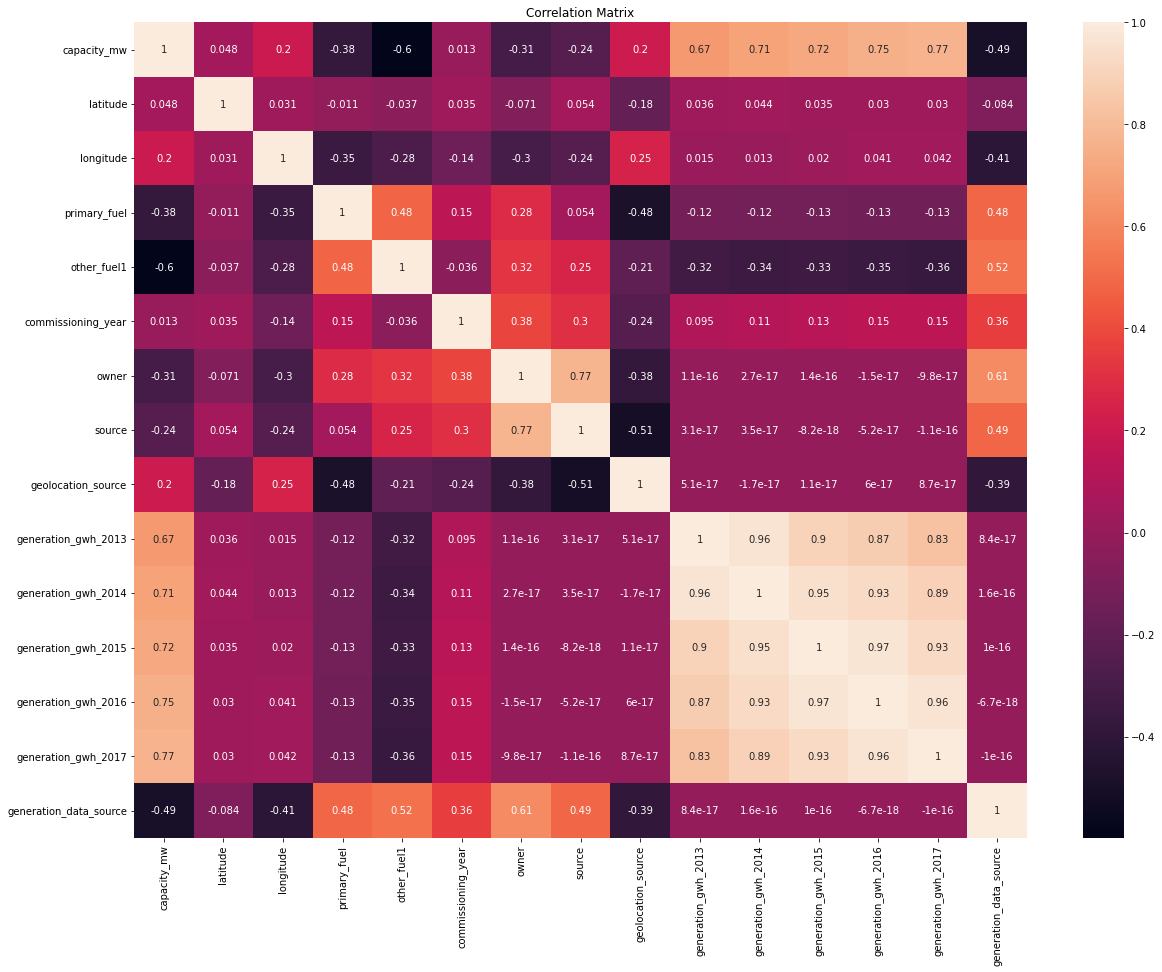

In [58]:
# Using Heatmap
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

According to the above image we observed capacity_mw are highly correlated with each other.

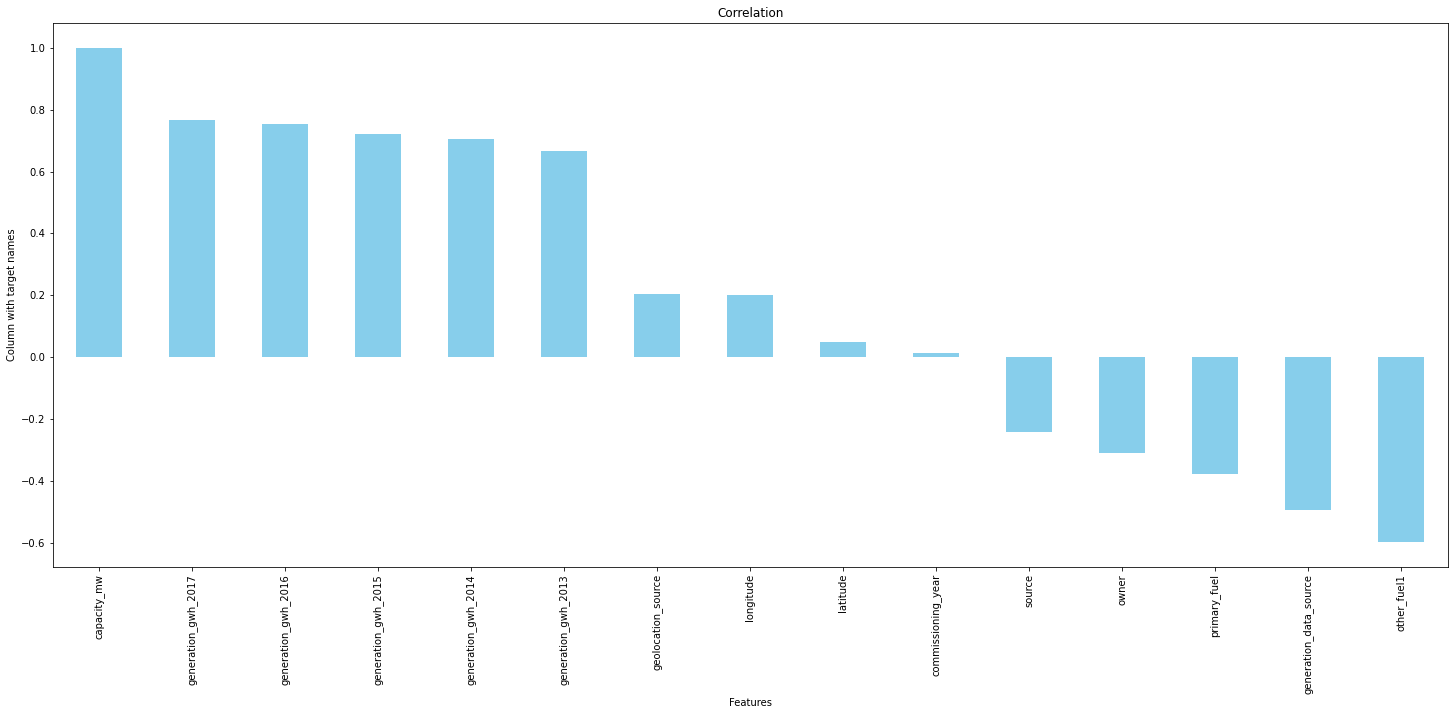

In [59]:
# Using correlation matrix
plt.figure(figsize =(25, 10))
df.corr()['capacity_mw'].sort_values(ascending = False).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

According to the above image we observed that, other_fuel 1 shows negative nature (-0.6),
In positive side capacity_mw has the highest correlation of (1).

# Scaling Data using StandardScaler

In [60]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [61]:
y = df_zscore['capacity_mw']
x = df_zscore
x.drop('capacity_mw',axis = 1, inplace = True)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.1519355 , -0.92515489,  1.13082103, ...,  0.3651011 ,
         0.36538581,  0.96456956],
       [ 0.58392722, -0.5040538 , -1.01610476, ...,  0.3651011 ,
         0.36538581,  0.96456956],
       [ 0.11305969, -2.36239631,  1.40357674, ...,  0.3651011 ,
         0.36538581,  0.96456956],
       ...,
       [-0.95693411, -0.22813903,  1.40357674, ...,  0.3651011 ,
         0.36538581,  0.96456956],
       [ 0.51515865, -0.76443158, -1.01610476, ...,  0.3651011 ,
         0.36538581,  0.96456956],
       [-1.7927908 ,  0.26037548,  1.40357674, ...,  0.3651011 ,
         0.36538581,  0.96456956]])

# Splitting the data for training and testing

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

# Model Building for capacity_mw

LinearRegression:

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
pred= lr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7730319010334225
Mean absolute error =  0.36571930017415255
Mean Squared error =  0.22013606075256856
Root Mean Sqaured Error=  0.4691865948133733


DecisionTreeRegressor:

In [65]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred= dtr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.692304536579764
Mean absolute error =  0.3949123383630226
Mean Squared error =  0.2984334253896236
Root Mean Sqaured Error=  0.5462906052547706


RandomForestRegressor:

In [66]:
from sklearn.ensemble import RandomForestRegressor  
rfr = RandomForestRegressor(n_estimators = 100, random_state = 12)
rfr.fit(X_train, y_train) 
pred= rfr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8245279488651386
Mean absolute error =  0.3028708383056479
Mean Squared error =  0.1701901116715519
Root Mean Sqaured Error=  0.41254104240857287


LassoRegressor:

In [67]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.1,random_state= 0)
lasso.fit(X_train, y_train) 
pred= lasso.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.7338621210767529
Mean absolute error =  0.4138829192954783
Mean Squared error =  0.2581267788291028
Root Mean Sqaured Error=  0.5080617864286812


KNeighborsRegressor:

In [68]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train) 
pred= knr.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.8150910801479239
Mean absolute error =  0.30795781262613997
Mean Squared error =  0.1793429182320575
Root Mean Sqaured Error=  0.42348898242109856


RidgeRegressor:

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.001,random_state= 0)
ridge.fit(X_train, y_train) 
pred= ridge.predict(X_test)
r2=r2_score(y_test,pred)
mae=mean_absolute_error(pred,y_test)
mse=mean_squared_error(pred,y_test)
rmse=np.sqrt(mean_squared_error(pred,y_test))
print('r2score=',r2)
print('Mean absolute error = ',mae)
print('Mean Squared error = ',mse)
print('Root Mean Sqaured Error= ',rmse)

r2score= 0.773031532270283
Mean absolute error =  0.3657194776761111
Mean Squared error =  0.22013641841545264
Root Mean Sqaured Error=  0.46918697596528897


As per above the Model building reports below: 
1. RidgeRegressor gives 77.30% of accuracy.
2. KNeighborsRegressor gives 81.50% of acccuracy.
3. LassoRegressor gives 73.38.% of accuracy.
4. RandomForestRegressor gives 82.45% of accuracy.
5. DecisionTreeRegressor gives 69.23% of accuracy.
6. LinearRegression gives 77.30.14% of accuracy.

we conclude that RandomForestRegressor gives a highest accuracy.

# Hyper Parameter Tuning for capacity_mw

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = { 'criterion':['mse', 'mae'],
              'max_features':['auto', 'sqrt'],
              'n_estimators': [100, 200, 300]}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=3)
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [73]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 200}

In [75]:
from sklearn.model_selection import cross_val_score
Final_mod_capacity = RandomForestRegressor(criterion= 'mse',max_features='sqrt',n_estimators=100)
Final_mod_capacity.fit(X_train,y_train)
pred = Final_mod_capacity.predict(X_test)
r2=r2_score(y_test,pred)
cv_score = cross_val_score(Final_mod_capacity,x_scaled,y,cv=3)
cv_mean = cv_score.mean()
print(r2,cv_mean)

0.8271630041106648 0.7947596735921999


The result of hyper parameter tuning 82% accurate and,  predicted 79%  both are similar almost.

# Model Building for primary fuel(Classification Model)

In [76]:
df['primary_fuel'].value_counts()

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64

In [77]:
y_fuel = df['primary_fuel']
x_fuel = df.drop(["primary_fuel"],axis = 1)
x_fuel

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,2011.0,229,109,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
1,98.0,24.7663,74.6090,3,2013.0,258,174,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,21.9038,69.3732,3,2013.0,2,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
3,135.0,23.8712,91.3602,3,2004.0,5,22,2,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1800.0,21.9603,82.4091,2,2015.0,5,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2,2016.0,5,22,2,2304.059202,2420.393316,0.994875,233.596650,865.400000,0
904,3.0,12.8932,78.1654,3,2013.0,114,77,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
905,25.5,15.2758,75.5811,3,2013.0,5,21,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
906,80.0,24.3500,73.7477,3,2013.0,91,59,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


In [78]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_fuel_scaled = scaler.fit_transform(x_fuel)
x_fuel_scaled

array([[-5.49310543e-01,  1.14329794e+00, -8.72208562e-01, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01],
       [-3.84627594e-01,  5.81755687e-01, -5.86027433e-01, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01],
       [-4.86024006e-01,  1.11421333e-01, -1.68109953e+00, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01],
       ...,
       [-5.09648681e-01, -9.77618351e-01, -3.82711877e-01, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01],
       [-4.15667312e-01,  5.13353874e-01, -7.66169073e-01, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01],
       [-5.25168540e-01, -1.85525815e+00,  1.37754177e-02, ...,
        -1.58055100e-16, -1.55659091e-16,  9.91227901e-01]])

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x_fuel_scaled, y_fuel, test_size=.25, random_state=42)

DecisionTreeClassifier:

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.94      0.86      0.89        69
           2       0.50      0.52      0.51        23
           3       0.90      0.96      0.93        68
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         8
           6       0.85      1.00      0.92        23
           7       1.00      1.00      1.00        29

    accuracy                           0.85       227
   macro avg       0.63      0.65      0.64       227
weighted avg       0.85      0.85      0.85       227



In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 6,  1,  0,  0,  0,  0,  0,  0],
       [ 1, 59,  5,  0,  0,  1,  3,  0],
       [ 0,  2, 12,  6,  1,  2,  0,  0],
       [ 0,  0,  2, 65,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  5,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29]], dtype=int64)

SVC:

In [82]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.27      0.57      0.36         7
           1       0.92      0.86      0.89        69
           2       0.00      0.00      0.00        23
           3       0.77      1.00      0.87        68
           5       0.00      0.00      0.00         8
           6       1.00      0.96      0.98        23
           7       0.76      1.00      0.87        29

    accuracy                           0.80       227
   macro avg       0.53      0.63      0.57       227
weighted avg       0.72      0.80      0.75       227



In [83]:
confusion_matrix(y_test,y_pred)

array([[ 4,  1,  0,  0,  0,  0,  2],
       [ 5, 59,  0,  0,  0,  0,  5],
       [ 4,  1,  0, 17,  0,  0,  1],
       [ 0,  0,  0, 68,  0,  0,  0],
       [ 2,  2,  0,  3,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0, 29]], dtype=int64)

KNeighborsClassifier:

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.91      0.86      0.88        69
           2       0.62      0.43      0.51        23
           3       0.89      0.96      0.92        68
           5       0.25      0.12      0.17         8
           6       1.00      1.00      1.00        23
           7       0.88      1.00      0.94        29

    accuracy                           0.85       227
   macro avg       0.71      0.73      0.70       227
weighted avg       0.84      0.85      0.84       227



In [85]:
confusion_matrix(y_test,y_pred)

array([[ 5,  1,  0,  0,  1,  0,  0],
       [ 7, 59,  0,  0,  0,  0,  3],
       [ 1,  1, 10,  8,  2,  0,  1],
       [ 0,  0,  3, 65,  0,  0,  0],
       [ 0,  4,  3,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0, 29]], dtype=int64)

LogisticRegression:

In [86]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.29      0.57      0.38         7
           1       0.93      0.90      0.91        69
           2       0.50      0.09      0.15        23
           3       0.79      0.99      0.88        68
           5       0.00      0.00      0.00         8
           6       1.00      0.96      0.98        23
           7       0.83      1.00      0.91        29

    accuracy                           0.82       227
   macro avg       0.62      0.64      0.60       227
weighted avg       0.78      0.82      0.78       227



In [87]:
confusion_matrix(y_test,y_pred)

array([[ 4,  1,  0,  0,  0,  0,  2],
       [ 4, 62,  1,  0,  0,  0,  2],
       [ 4,  1,  2, 15,  0,  0,  1],
       [ 0,  0,  1, 67,  0,  0,  0],
       [ 2,  2,  0,  3,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 22,  0],
       [ 0,  0,  0,  0,  0,  0, 29]], dtype=int64)

AdaBoostClassifier:

In [88]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.19      1.00      0.32         7
           1       0.08      0.03      0.04        69
           2       0.04      0.09      0.06        23
           3       0.77      1.00      0.87        68
           5       0.00      0.00      0.00         8
           6       1.00      0.96      0.98        23
           7       0.89      0.28      0.42        29

    accuracy                           0.48       227
   macro avg       0.43      0.48      0.38       227
weighted avg       0.48      0.48      0.44       227



In [89]:
confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0,  0,  0,  0,  0],
       [22,  2, 44,  0,  0,  0,  1],
       [ 4,  0,  2, 17,  0,  0,  0],
       [ 0,  0,  0, 68,  0,  0,  0],
       [ 3,  1,  1,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 22,  0],
       [ 0, 21,  0,  0,  0,  0,  8]], dtype=int64)

RandomForestClassifier:

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.92      0.97      0.94        69
           2       0.75      0.39      0.51        23
           3       0.86      1.00      0.93        68
           5       1.00      0.12      0.22         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29

    accuracy                           0.89       227
   macro avg       0.88      0.76      0.76       227
weighted avg       0.90      0.89      0.87       227



In [91]:
confusion_matrix(y_test,y_pred)

array([[ 6,  1,  0,  0,  0,  0,  0],
       [ 2, 67,  0,  0,  0,  0,  0],
       [ 2,  2,  9, 10,  0,  0,  0],
       [ 0,  0,  0, 68,  0,  0,  0],
       [ 0,  3,  3,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 23,  0],
       [ 0,  0,  0,  0,  0,  0, 29]], dtype=int64)

cross_val_score:

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
print(cross_val_score(dtc,x_fuel_scaled,y_fuel,cv=5).mean())
print(cross_val_score(rfc,x_fuel_scaled,y_fuel,cv=5).mean())
print(cross_val_score(lr,x_fuel_scaled,y_fuel,cv=5).mean())
print(cross_val_score(abc,x_fuel_scaled,y_fuel,cv=5).mean())
print(cross_val_score(knc,x_fuel_scaled,y_fuel,cv=5).mean())
print(cross_val_score(sv,x_fuel_scaled,y_fuel,cv=5).mean())

0.8634509137271568
0.9052941533604517
0.839244733167385
0.5054702203873476
0.8734017363851618
0.8359662437010504


We conclude that the Random Forest Classifier is the best model for predicting the primary fuel according to the above metrics

# Hyper parameter Tuning for primary fuel

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameter = { 'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
              'max_features':['auto', 'sqrt', 'log2'],}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [96]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2'}

In [97]:
Final_mod_fuel = RandomForestClassifier(criterion='gini',max_depth=34,max_features='log2')
Final_mod_fuel.fit(X_train,y_train)
pred = Final_mod_fuel.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

89.86784140969164


# Saving the model

In [98]:
import joblib
joblib.dump(Final_mod_fuel,"PowerPlantFuel.pkl")

['PowerPlantFuel.pkl']